# Cropping Models

https://github.com/shaoanlu/GazeML-keras

In [1]:
import pandas as pd
import os
import io 
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [2]:
from detector.face_detector import MTCNNFaceDetector
import tensorflow as tf
#from keras import backend as K

<function Network.conv at 0x7f09ffc3f940>
<function Network.prelu at 0x7f09ffc3fc10>
<function Network.max_pool at 0x7f09ffc3fe50>
<function Network.fc at 0x7f09feea50d0>
<function Network.softmax at 0x7f09feea5310>


In [3]:
ls mtcnn_weights/

det1.npy  det2.npy  det3.npy  README.md


In [4]:
mtcnn_weights_dir = "./mtcnn_weights/"
MTCNNFaceDetector(sess=tf.compat.v1.keras.backend.get_session(), model_path=mtcnn_weights_dir)

Tensor("input:0", shape=(None, None, None, 3), dtype=float32) --input conv
Tensor("conv1/BiasAdd:0", shape=(None, None, None, 10), dtype=float32) ---out conv
{'data': <tf.Tensor 'input:0' shape=(None, None, None, 3) dtype=float32>, 'conv1': <tf.Tensor 'conv1/BiasAdd:0' shape=(None, None, None, 10) dtype=float32>} --after
----layer_decorated----
Tensor("conv1/BiasAdd:0", shape=(None, None, None, 10), dtype=float32) ---input prelu
Tensor("PReLU1/add:0", shape=(None, None, None, 10), dtype=float32) ---out prelu
{'data': <tf.Tensor 'input:0' shape=(None, None, None, 3) dtype=float32>, 'conv1': <tf.Tensor 'conv1/BiasAdd:0' shape=(None, None, None, 10) dtype=float32>, 'PReLU1': <tf.Tensor 'PReLU1/add:0' shape=(None, None, None, 10) dtype=float32>} --after
----layer_decorated----
Tensor("PReLU1/add:0", shape=(None, None, None, 10), dtype=float32) ---input maxpool
Tensor("pool1:0", shape=(None, None, None, 10), dtype=float32) ---out maxpool
{'data': <tf.Tensor 'input:0' shape=(None, None, None

Tensor("rnet/prelu2/add:0", shape=(None, 9, 9, 48), dtype=float32) ---out prelu
{'data': <tf.Tensor 'rnet/input:0' shape=(None, 24, 24, 3) dtype=float32>, 'conv1': <tf.Tensor 'rnet/conv1/BiasAdd:0' shape=(None, 22, 22, 28) dtype=float32>, 'prelu1': <tf.Tensor 'rnet/prelu1/add:0' shape=(None, 22, 22, 28) dtype=float32>, 'pool1': <tf.Tensor 'rnet/pool1:0' shape=(None, 11, 11, 28) dtype=float32>, 'conv2': <tf.Tensor 'rnet/conv2/BiasAdd:0' shape=(None, 9, 9, 48) dtype=float32>, 'prelu2': <tf.Tensor 'rnet/prelu2/add:0' shape=(None, 9, 9, 48) dtype=float32>} --after
----layer_decorated----
Tensor("rnet/prelu2/add:0", shape=(None, 9, 9, 48), dtype=float32) ---input maxpool
Tensor("rnet/pool2:0", shape=(None, 4, 4, 48), dtype=float32) ---out maxpool
{'data': <tf.Tensor 'rnet/input:0' shape=(None, 24, 24, 3) dtype=float32>, 'conv1': <tf.Tensor 'rnet/conv1/BiasAdd:0' shape=(None, 22, 22, 28) dtype=float32>, 'prelu1': <tf.Tensor 'rnet/prelu1/add:0' shape=(None, 22, 22, 28) dtype=float32>, 'pool1'

Tensor("onet/input:0", shape=(None, 48, 48, 3), dtype=float32) --input conv
Tensor("onet/conv1/BiasAdd:0", shape=(None, 46, 46, 32), dtype=float32) ---out conv
{'data': <tf.Tensor 'onet/input:0' shape=(None, 48, 48, 3) dtype=float32>, 'conv1': <tf.Tensor 'onet/conv1/BiasAdd:0' shape=(None, 46, 46, 32) dtype=float32>} --after
----layer_decorated----
Tensor("onet/conv1/BiasAdd:0", shape=(None, 46, 46, 32), dtype=float32) ---input prelu
Tensor("onet/prelu1/add:0", shape=(None, 46, 46, 32), dtype=float32) ---out prelu
{'data': <tf.Tensor 'onet/input:0' shape=(None, 48, 48, 3) dtype=float32>, 'conv1': <tf.Tensor 'onet/conv1/BiasAdd:0' shape=(None, 46, 46, 32) dtype=float32>, 'prelu1': <tf.Tensor 'onet/prelu1/add:0' shape=(None, 46, 46, 32) dtype=float32>} --after
----layer_decorated----
Tensor("onet/prelu1/add:0", shape=(None, 46, 46, 32), dtype=float32) ---input maxpool
Tensor("onet/pool1:0", shape=(None, 23, 23, 32), dtype=float32) ---out maxpool
{'data': <tf.Tensor 'onet/input:0' shape=(

In [5]:
ls

 cat.cms               'MicrosoftTeams-image (1).jpg'
 CroppingModels.ipynb   models/
 detector/              mtcnn_detect_face.py
 elg_weights/           mtcnn_weights/
 EyesCropping2.ipynb    no_face.jpg
 EyesCropping.ipynb     __pycache__/
 faace.jpg              sunglasses_no_sunglasses.jpg
 fuzzyfaces.jpg         sunnglasses.jpg
 image.jpeg


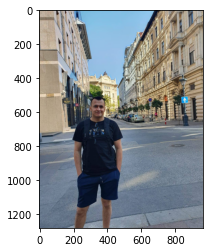

In [6]:
img_path = "image.jpeg"
input_img = cv2.imread(img_path)[..., ::-1]
plt.imshow(input_img)

In [7]:
# face, lms = fd.detect_face(input_img) # assuming there is only one face in input image
# assert len(face) >= 1, "No face detected"

In [8]:
# left_eye_im, right_eye_im = fd.cropImage(input_img,lms)

In [9]:
# left_eye_xy = np.array([lms[6], lms[1]])
# right_eye_xy = np.array([lms[5], lms[0]])
# nouse = np.array([lms[7], lms[2]])
# right_mouth=np.array([lms[8], lms[3]])
# left_mouth=np.array([lms[9], lms[4]])

# dist_eyes = np.linalg.norm(left_eye_xy - right_eye_xy)
# eye_bbox_w = (dist_eyes / 1.25)
# eye_bbox_h = (eye_bbox_w *0.6)

# plt.figure(figsize=(15,4))
# draw = input_img.copy()
# for i, lm in enumerate([left_eye_xy, right_eye_xy]):
#     draw = cv2.circle(draw, (int(lm[1]), int(lm[0])), 15, (255*i,255*(1-i),0), -1)
# draw = cv2.circle(draw, (int(nouse[1]), int(nouse[0])), 15, (255,255*(1-0),0), -1)
# for i, lm in enumerate([left_mouth, right_mouth]):
#     draw = cv2.circle(draw, (int(lm[1]), int(lm[0])), 15, (255*i,255*(1-i),0), -1)

# plt.subplot(1,3,1)
# plt.title('Annotation')
# plt.imshow(draw)
# plt.subplot(1,3,2)
# plt.title('Left eye')
# plt.imshow(left_eye_im)
# plt.subplot(1,3,3)
# plt.title('Right eye')
# plt.imshow(right_eye_im)

In [10]:
# from models.elg_keras import KerasELG
# model = KerasELG()
# model.net.load_weights("./elg_weights/elg_keras.h5")

In [11]:
# inp_left = cv2.cvtColor(left_eye_im, cv2.COLOR_RGB2GRAY)
# inp_left = cv2.equalizeHist(inp_left)
# inp_left = cv2.resize(inp_left, (180,108))[np.newaxis, ..., np.newaxis]

# inp_right = cv2.cvtColor(right_eye_im, cv2.COLOR_RGB2GRAY)
# inp_right = cv2.equalizeHist(inp_right)
# inp_right = cv2.resize(inp_right, (180,108))[np.newaxis, ..., np.newaxis]

In [12]:
# input_array = np.concatenate([inp_left, inp_right], axis=0)
# pred_left, pred_right = model.net.predict(input_array/255 * 2 - 1)

In [13]:
# def draw_pupil(im, inp_im, lms):
#     draw = im.copy()
#     #print(draw.shape)
#     draw = cv2.resize(draw, (inp_im.shape[2], inp_im.shape[1]))
#     stroke = inp_im.shape[1] // 30
#     for i, lm in enumerate(np.squeeze(lms)):

#         x, y = int(lm[0]*3), int(lm[1]*3)
#         if i < 8:
#             draw = cv2.circle(draw, (x, y), stroke, (125,255,125), -1)
#         elif 8 <= i < 16:
#             draw = cv2.circle(draw, (x, y), stroke, (125,125,255), -1)         

#     return draw

In [14]:
# plt.figure(figsize=(15,4))
# plt.subplot(1,2,1)
# plt.title("Left eye")
# lms_left = model._calculate_landmarks(pred_left)
# result_left = draw_pupil(left_eye_im, inp_left, lms_left)
# plt.imshow(result_left)
# plt.subplot(1,2,2)
# plt.title("Right eye")
# lms_right = model._calculate_landmarks(pred_right)
# result_right = draw_pupil(right_eye_im, inp_right, lms_right)
# plt.imshow(result_right)

In [15]:
# plt.figure(figsize=(15,4))
# plt.subplot(1,2,1)
# plt.title("Left eye")
# cropped_left= right_eye_im[int(lms_left[0][10][1] * 3):int(lms_left[0][14][1] * 3),
#                 int(lms_left[0][0][0] * 3):int(lms_left[0][5][0] * 3)]
# plt.imshow(cropped_left)

# plt.subplot(1,2,2)
# plt.title("Right eye")
# cropped_right= right_eye_im[int(lms_right[0][10][1] * 3):int(lms_right[0][14][1] * 3),
#                 int(lms_right[0][0][0] * 3):int(lms_right[0][5][0] * 3)]
# plt.imshow(cropped_right)

In [5]:
from keras.models import load_model

## Models Integration


In [12]:
def Image_croping(image , detect_model_path):
   ## loading wieghts
    fd = MTCNNFaceDetector(sess=tf.compat.v1.keras.backend.get_session(), model_path=detect_model_path)
    face, lms = fd.detect_face(image) 
    if len(face) == 1 :
        left_eye_im, right_eye_im = fd.cropImage(image,lms)
        return left_eye_im , right_eye_im , face
    if len(face) > 1 :
        return 'Multiple faces detected' , 'Multiple faces detected'  , face
    return 'no face detected' ,  'no face detected' , face


def Diagnosis(left_eye_im , right_eye_im , diagnosis_model_path):
    
    model = load_model(diagnosis_model_path)
    ###### left eye #### 
    left_eye_im = cv2.resize(left_eye_im, (100, 100))
    left_eye_im = left_eye_im.reshape(1 ,100 , 100 , -1)
    left_eye_im_diagnosis = model.predict(left_eye_im)
    if left_eye_im_diagnosis > 0.56:
        left_eye_im_desc =  ' Left Eye : Cataract detected'
    else :
        left_eye_im_desc = 'Left Eye : No Cataract detected'
    
    
    
    ##### right eye ### 
    right_eye_im = cv2.resize(right_eye_im, (100, 100))
    right_eye_im = right_eye_im.reshape(1 ,100 , 100 , -1)
    right_eye_im_diagnosis  = model.predict(right_eye_im)
    
    if right_eye_im_diagnosis > 0.56:
        right_eye_im_desc =  'Right Eye : Cataract detected'
    else :
        right_eye_im_desc = 'Right Eye : No Cataract detected'
    
    return left_eye_im_desc ,left_eye_im_diagnosis[0], right_eye_im_desc , right_eye_im_diagnosis[0]

def Main(image , detect_model_path , diagnosis_model_path):
    left_eye_im , right_eye_im , face = Image_croping(image , detect_model_path)
    
    if len(face) != 1 :
        return left_eye_im , left_eye_im, left_eye_im , left_eye_im , left_eye_im , left_eye_im 
        
    left_eye_im_desc ,left_eye_im_diagnosis, right_eye_im_desc , right_eye_im_diagnosis = Diagnosis(left_eye_im , right_eye_im , diagnosis_model_path)
    
    return left_eye_im , left_eye_im_desc , left_eye_im_diagnosis , right_eye_im , right_eye_im_desc , right_eye_im_diagnosis

 
    
        


In [24]:
ls

'7 - dr. Meiliana Lay.jpeg'  'M. Alim.JPG'
 cat.jpg                     'MicrosoftTeams-image (1).jpg'
 CroppingModels.ipynb         models/
 detector/                    mtcnn_detect_face.py
 elg_weights/                 mtcnn_weights/
 EyesCropping2.ipynb          no_face.jpg
 EyesCropping.ipynb           __pycache__/
 faace.jpg                    sunglasses_no_sunglasses.jpg
 fuzzyfaces.jpg               sunnglasses.jpg
 image.jpeg                   unhealthy.jpg


In [25]:
diagnosis_model_path = '/home/khaldoun/Desktop/TOV_DataAcquisition/saved_models/Final_models/accuracy-92size100x100_Threshold_0.56.h5'
detect_model_path = "./mtcnn_weights/" 
img_path = "M. Alim.JPG"
image = cv2.imread(img_path)[..., ::-1]
left_eye_im , left_eye_im_desc , left_eye_im_diagnosis , right_eye_im , right_eye_im_desc , right_eye_im_diagnosis = Main(image , detect_model_path , diagnosis_model_path)

Tensor("pnet_4/input:0", shape=(None, None, None, 3), dtype=float32) --input conv
Tensor("pnet_4/conv1/BiasAdd:0", shape=(None, None, None, 10), dtype=float32) ---out conv
{'data': <tf.Tensor 'pnet_4/input:0' shape=(None, None, None, 3) dtype=float32>, 'conv1': <tf.Tensor 'pnet_4/conv1/BiasAdd:0' shape=(None, None, None, 10) dtype=float32>} --after
----layer_decorated----
Tensor("pnet_4/conv1/BiasAdd:0", shape=(None, None, None, 10), dtype=float32) ---input prelu
Tensor("pnet_4/PReLU1/add:0", shape=(None, None, None, 10), dtype=float32) ---out prelu
{'data': <tf.Tensor 'pnet_4/input:0' shape=(None, None, None, 3) dtype=float32>, 'conv1': <tf.Tensor 'pnet_4/conv1/BiasAdd:0' shape=(None, None, None, 10) dtype=float32>, 'PReLU1': <tf.Tensor 'pnet_4/PReLU1/add:0' shape=(None, None, None, 10) dtype=float32>} --after
----layer_decorated----
Tensor("pnet_4/PReLU1/add:0", shape=(None, None, None, 10), dtype=float32) ---input maxpool
Tensor("pnet_4/pool1:0", shape=(None, None, None, 10), dtype=

Tensor("onet_5/input:0", shape=(None, 48, 48, 3), dtype=float32) --input conv
Tensor("onet_5/conv1/BiasAdd:0", shape=(None, 46, 46, 32), dtype=float32) ---out conv
{'data': <tf.Tensor 'onet_5/input:0' shape=(None, 48, 48, 3) dtype=float32>, 'conv1': <tf.Tensor 'onet_5/conv1/BiasAdd:0' shape=(None, 46, 46, 32) dtype=float32>} --after
----layer_decorated----
Tensor("onet_5/conv1/BiasAdd:0", shape=(None, 46, 46, 32), dtype=float32) ---input prelu
Tensor("onet_5/prelu1/add:0", shape=(None, 46, 46, 32), dtype=float32) ---out prelu
{'data': <tf.Tensor 'onet_5/input:0' shape=(None, 48, 48, 3) dtype=float32>, 'conv1': <tf.Tensor 'onet_5/conv1/BiasAdd:0' shape=(None, 46, 46, 32) dtype=float32>, 'prelu1': <tf.Tensor 'onet_5/prelu1/add:0' shape=(None, 46, 46, 32) dtype=float32>} --after
----layer_decorated----
Tensor("onet_5/prelu1/add:0", shape=(None, 46, 46, 32), dtype=float32) ---input maxpool
Tensor("onet_5/pool1:0", shape=(None, 23, 23, 32), dtype=float32) ---out maxpool
{'data': <tf.Tensor 

no face detected no face detected


TypeError: Image data of dtype <U16 cannot be converted to float

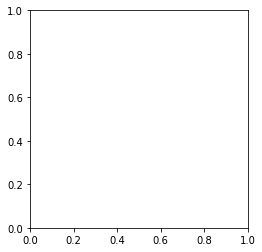

In [26]:
print(left_eye_im_desc , left_eye_im_diagnosis)
plt.imshow(left_eye_im)
plt.show()
print(right_eye_im_desc , right_eye_im_diagnosis)
plt.imshow(right_eye_im)

plt.show()

plt.imshow(image)

In [ ]:
model.summary()

In [16]:
ls

'7 - dr. Meiliana Lay.jpeg'  'MicrosoftTeams-image (1).jpg'
 cat.jpg                      models/
 CroppingModels.ipynb         mtcnn_detect_face.py
 detector/                    mtcnn_weights/
 elg_weights/                 no_face.jpg
 EyesCropping2.ipynb          __pycache__/
 EyesCropping.ipynb           sunglasses_no_sunglasses.jpg
 faace.jpg                    sunnglasses.jpg
 fuzzyfaces.jpg               unhealthy.jpg
 image.jpeg


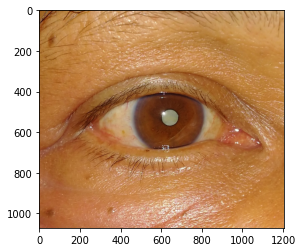

In [17]:
diagnosis_model_path = '/home/khaldoun/Desktop/TOV_DataAcquisition/saved_models/Final_models/accuracy-92size100x100_Threshold_0.56.h5'
model = load_model(diagnosis_model_path)
img_path = 'MicrosoftTeams-image (1).jpg'
left_eye_im = cv2.imread(img_path)[..., ::-1]
plt.imshow(left_eye_im)

In [18]:
left_eye_im = cv2.resize(left_eye_im , (100, 100))
left_eye_im = left_eye_im.reshape(1 ,100 , 100 , -1)
model.predict(left_eye_im)

array([[0.06232017]], dtype=float32)